In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix,precision_score,recall_score

df=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv',index_col=False)
df.set_index('Id', inplace=True)
df

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    

In [3]:
SEED = 42
TARGET = 'Class'
FEATURES = df.columns.drop(TARGET)

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(NUMERICAL)
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(CATEGORICAL)
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')
Numerical features: AB, AF, AH, AM, AR, AX, AY, AZ, BC, BD , BN, BP, BQ, BR, BZ, CB, CC, CD , CF, CH, CL, CR, CS, CU, CW , DA, DE, DF, DH, DI, DL, DN, DU, DV, DY, EB, EE, EG, EH, EL, EP, EU, FC, FD , FE, FI, FL, FR, FS, GB, GE, GF, GH, GI, GL
Index(['EJ'], dtype='object')
Categorical features: EJ


In [4]:
X=df.drop(columns=TARGET)
y=df[TARGET]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [6]:
numerical_pipe = Pipeline([
    ('imputer',IterativeImputer()),
    ('imputer1', SimpleImputer(strategy='mean',fill_value=np.NaN)),
    #('scaler', MinMaxScaler()),
    #('pca',PCA(n_components=5))
])

categorical_pipe = Pipeline([

    ('imputer1', SimpleImputer(strategy='most_frequent', fill_value=np.NaN)),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe1 = Pipeline([
    ('preprocessors', preprocessors),
])


In [7]:

model1 = RandomForestClassifier()
model2 = LGBMClassifier()
model3 = XGBClassifier()
model4 = ExtraTreesClassifier()
model5 = AdaBoostClassifier()
model6 = GradientBoostingClassifier()

In [8]:
from sklearn.calibration import CalibratedClassifierCV
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
model1 = CalibratedClassifierCV(model1, method='sigmoid', cv=cv)
model2 = CalibratedClassifierCV(model2, method='sigmoid', cv=cv)
model3 = CalibratedClassifierCV(model3, method='sigmoid', cv=cv)
model4 = CalibratedClassifierCV(model4, method='sigmoid', cv=cv)
model5 = CalibratedClassifierCV(model5, method='sigmoid', cv=cv)
model6 = CalibratedClassifierCV(model6, method='sigmoid', cv=cv)

#vc = VotingClassifier(estimators=[
#      ('1',model1),('2',model2),('3',model3),('4',model4),('5',model5)], voting='soft')
vc = VotingClassifier(estimators=[
          ('1',model1),('2',model2),('3',model3),('4',model4),('5',model5),('6',model6)], voting='soft')


In [9]:
X=df.drop(columns=TARGET)
y=df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train=X
#y_train=y

In [10]:
pipe1 = Pipeline([
    ('preprocessors', preprocessors),
    ('model', vc)
])

pipe1.fit(X_train, y_train)
y_pred=pipe1.predict(X_test)
print(y_pred)
y_pred_proba=pipe1.predict_proba(X_test)
print(y_pred_proba)
X_test=pipe1[0].transform(X_test)
print(pipe1[1].score(X_test,y_test))
accuracy_score(y_test,y_pred)

[1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0]
[[0.29627552 0.70372448]
 [0.79988639 0.20011361]
 [0.95168181 0.04831819]
 [0.37654815 0.62345185]
 [0.21647585 0.78352415]
 [0.9503772  0.0496228 ]
 [0.16983442 0.83016558]
 [0.92935977 0.07064023]
 [0.9359151  0.0640849 ]
 [0.92799911 0.07200089]
 [0.95437151 0.04562849]
 [0.288543   0.711457  ]
 [0.90357076 0.09642924]
 [0.62579266 0.37420734]
 [0.91146608 0.08853392]
 [0.93593767 0.06406233]
 [0.94104926 0.05895074]
 [0.93459129 0.06540871]
 [0.89271076 0.10728924]
 [0.14310243 0.85689757]
 [0.35356117 0.64643883]
 [0.74248273 0.25751727]
 [0.95095007 0.04904993]
 [0.83661597 0.16338403]
 [0.74668281 0.25331719]
 [0.94631574 0.05368426]
 [0.9345177  0.0654823 ]
 [0.95318468 0.04681532]
 [0.89969325 0.10030675]
 [0.96303713 0.0369628

0.9435483870967742

<Axes: >

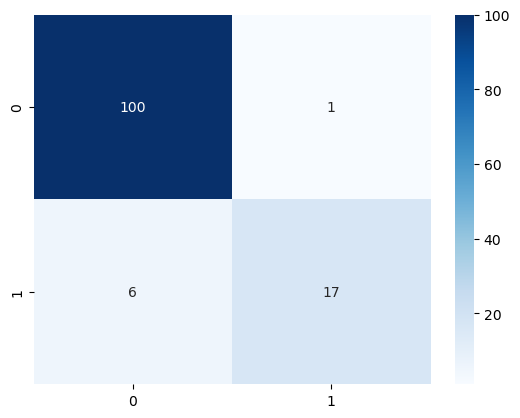

In [11]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')

In [12]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

2.0347223687404847

In [14]:
### SUBMISSIONS

In [15]:
test=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv',index_col=False)
test.set_index('Id', inplace=True)
y=pipe1.predict(test)
print(y)
y_sub=pipe1.predict_proba(test)
print(y_sub)
sub=pd.DataFrame(y_sub,index=test.index,columns=['class_0','class_1'])

[0 0 0 0 0]
[[0.58612333 0.41387667]
 [0.58612333 0.41387667]
 [0.58612333 0.41387667]
 [0.58612333 0.41387667]
 [0.58612333 0.41387667]]


In [16]:
sub.to_csv('/kaggle/working/submission.csv')


In [17]:
pd.read_csv('submission.csv')

,Id,class_0,class_1
0,00eed32682bb,0.586123,0.413877
1,010ebe33f668,0.586123,0.413877
2,02fa521e1838,0.586123,0.413877
3,040e15f562a2,0.586123,0.413877
4,046e85c7cc7f,0.586123,0.413877
